In [8]:
import numpy as np
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

Si tenes

```python 
fx= exp(-c*abs(x))
``` 
la tranformada de esto es 

```python 
Fk=2*c./(c^2 + k.^2)
``` 
ponele que **yo quiero graficar fx en un intervalo x=[a:dx:b]**, pero solo tengo Fk, entonces deberia obtener fx haciendo ifft(Fk) luego de haber sampleaado Fk en un invertalo de k que no tengo idea  pero  deberia tener alguna relacion con a b y dx

entonces luego de hacer:
```python 
f2=ifftshift(ifft(Fk))
``` 

haciendo 
```python 
plot(x,f2)
``` 

deberia superponerse con 
```python 
plot(x,f)
``` 


deberia...

pero no anda

### defino intervalos:

In [5]:
a=-4
b=4
dx=0.1
Nx=(b-a)/dx+1
x=np.linspace(a,b,int(Nx))



dk=1/(b-a)
Nk=(2/dx)/dk+1
k=np.linspace(-1/dx, 1/dx,int(Nx))


### ordeno k para meterlo en la ifft
segun:

 If A = fft(a, n), then A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2] contains the positive-frequency terms, and A[n/2+1:] contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, A[(n-1)/2] contains the largest positive frequency, while A[(n+1)/2] contains the largest negative frequency. 

In [6]:
k0=np.array(k[int((Nx+1)/2) -1] )
kn=k[0:int((Nx+1)/2) -1]
kp=k[int((Nx+1)/2):]
ks=np.append(k0,[kp,kn])


### defino funciones


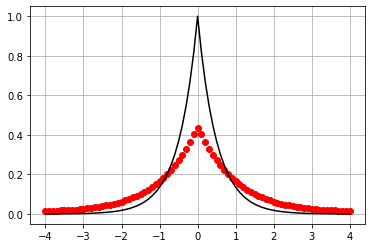

In [9]:
c=2

fx=np.exp(c*-abs(x))
Fk=(2*c)/((4*np.pi*np.pi*ks**2)+ c*c)


fx2=np.fft.ifft(Fk,norm ="ortho")

fx2s=np.fft.fftshift(fx2) #vuelvo al orden normal

plt.plot(x,np.real(fx2s),'ro')
plt.plot(x,fx,'k')
plt.grid(True)

### pruebo DFTs 

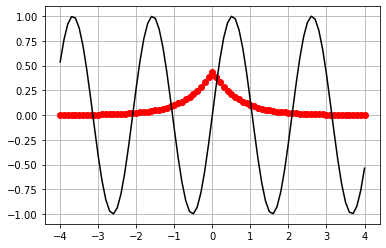

In [11]:
c=3
fx=np.sin(c*x)
Fk=(2*c)/((4*np.pi*np.pi*ks**2)+ c*c)


fx2=np.fft.ifft(Fk,norm ="ortho")

fx2s=np.fft.fftshift(fx2) #vuelvo al orden normal

plt.plot(x,np.real(fx2s),'ro')
plt.plot(x,fx,'k')
plt.grid(True)

https://dsp.stackexchange.com/questions/40766/calculating-values-of-frequency-bins-in-python


https://dsp.stackexchange.com/questions/8384/what-is-the-relationship-between-frequency-vector-and-the-peak-frequency-in-fft